## Introduction

Tanzania is grappling with several pressing issues, including frequent occurrence of severe droughts which have devastating effects on the environment and human settlements. Access to clean water is a major concern in Tanzania. Only 55% of the population has access to improved water sources, and a mere 44% have piped water. This shortage has significant implications for public health, food security, and economic development. Rural areas are particularly affected, with many communities relying on informal and often unreliable sources of water.  

### Business understanding
Access to clean water is a fundamental human right, yet millions of people in Tanzania lack reliable access to safe drinking water. Investment has been done heavily on drilling water wells, but many of these wells are non-functional, leaving communities without access to this essential resource. The lack of functional water wells has severe consequences, including increased risk of waterborne diseases, reduced economic productivity, and decreased quality of life.

The goal of this project is to develop a predictive model that can identify which water wells are likely to be non-functional, allowing the Tanzanian government and other stakeholders to target their efforts more effectively, improving the lives of thousands of people. Our model can be used to inform data-driven decision making, optimize maintenance and repair efforts, and ultimately reduce the number of communities without access to safe drinking water.

#### Stakeholders
- Local Communities: Direct beneficiaries of functional wells.
- Non-Governmental Organizations (NGOs): Organizations funding and supporting water projects.
- Government Agencies: Involved in water resource management and infrastructure.
- Data Scientists and Analysts: Responsible for analyzing data to guide decision-making.


#### Objectives

- Develop a predictive model that can accurately classify wells as functional or non-functional
- Evaluate the performance of different machine learning models and select the best one
- Provide recommendations for improving the accuracy of well functionality predictions.

### Data Understanding

The data for this project comes from the Taarifa waterpoints dashboard, which aggregates data from the Tanzania Ministry of Water. The data is suitable for this project because it provides a comprehensive overview of the water wells in Tanzania, including their characteristics and status. We can use it to identify patterns and relationships between different features, which can inform our predictive models to determine the funcionality of water wells.

It is divided into three CSV files: a training set containing 59,400 observations (80%) and a test set containing 14,850 observations (20%). The third dataset contains training set labels that detail status group information for each of the training set values indicating whether the pump is “functional”, “non-functional”, or “in need of repairs”. Both the train and test datasets have 40 similar columns with information about water pumps in Tanzania.

The limitations of the dataset are;
   - The data is limited to water wells in Tanzania and may not be representative of water wells in other countries.
   - The data does not include information on the maintenance history of the wells, which can affect their status.

Hence models developed may not be generalizable to other countries or contexts, and may not capture the full range of factors that affect the status of water wells.

### Data Preparation

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the csv files
training_set_values = pd.read_csv("training_set_values.csv")
test_set_values = pd.read_csv("test_set_values.csv")
training_set_labels = pd.read_csv("training_set_labels.csv")

In [3]:
def explore_datasets():
    
    # Explore the structure of datasets
    def explore_structure(data, name):
        print(f"Structure of {name}:")
        print(data.info())
        print("\n")

    explore_structure(training_set_values, "training_set_values")
    explore_structure(test_set_values, "test_set_values")
    explore_structure(training_set_labels, "training_set_labels")
    
    # Display the first few rows of the datasets
    def explore_first_few_rows(data, name):
        print(f"First few rows of {name}:")
        print(data.head().to_string(index=False))
        print("\n")
    explore_first_few_rows(training_set_values, "training_set_values")
    explore_first_few_rows(test_set_values, "test_set_values")
    explore_first_few_rows(training_set_labels, "training_set_labels")
   
   #Display if there are any missing values
    def explore_missing_values(data, name):
        print(f"Distribution of {name}:")
        print(data.isna().sum())
        print("\n")
    explore_missing_values(training_set_values, "training_set_values")
    explore_missing_values(test_set_values, "test_set_values")
    explore_missing_values(training_set_labels, "training_set_labels")
   
   # Call the function
explore_datasets()

Structure of training_set_values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code       

Train set has 59400 water points data with 40 features. Train labels data has 59400 same water points with train set but just has information about id of these points and status of them.
The index numbers in two data sets look same but it is impossible to check the nearly 60000 points. So, to make sure we assign data sets 'id' as index and after that merge them.

In [4]:
training_set_values.set_index('id',inplace=True) 
training_set_labels.set_index('id',inplace=True)
df = pd.merge(training_set_labels, training_set_values, how = 'inner', left_index = True,right_index=True)
df.reset_index(names=['new_id'])

,new_id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,functional,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  object 
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lga

In [6]:
obj_df = df.select_dtypes(include=['object']) 
obj_df.nunique()

status_group                 3
date_recorded              356
funder                    1896
installer                 2145
wpt_name                 37399
basin                        9
subvillage               19287
region                      21
lga                        125
ward                      2092
public_meeting               2
recorded_by                  1
scheme_management           11
scheme_name               2695
permit                       2
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
dtype: int64

#### Missing values
scheme_name has the most missing values,other columns with missing values are; funder, installer, public_meeting, scheme_management, permit, and subvillage. 

#### Duplicate and Similar Data
The following columns all contain duplicate or similar data, will remove features that will cause multicollinearity:

- extraction_type, extraction_type_group, and extraction_type_class
- payment and payment_type
- water_quality and quality_group
- quantity and quantity_group
- source and source_type
- waterpoint_type and waterpoint_type_group
- region and region_code
- management and management_group

#### Data types
wpt_name, subvillage, ward, scheme_name, installer, funder, and date_recorded are categorical features that have unique values in the thousands. This will be a problem with dummy variables, will likely remove or feature engineer.

I will drop recorded_by as it has the same value for all rows.

public_meeting and permit are boolean.

I will clean the dataset by removing similar and unnecessary columns and trim the dataset. I will also further investigate whether some columns contain the same information if it was not immediately obvious.

In [7]:
df.drop(columns=['scheme_name', 'funder','installer', 'public_meeting','permit','subvillage','management_group','scheme_management',
                 'quantity_group','source_type','quality_group','payment_type','extraction_type_class','recorded_by','extraction_type', 
                 'waterpoint_type_group','region_code','wpt_name','ward', 'date_recorded'],inplace=True )

In [8]:
df

,status_group,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,district_code,lga,population,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,source_class,waterpoint_type
id,,,,,,,,,,,,,,,,,,,,
69572,functional,6000.0,1390,34.938093,-9.856322,0,Lake Nyasa,Iringa,5,Ludewa,109,1999,gravity,vwc,pay annually,soft,enough,spring,groundwater,communal standpipe
8776,functional,0.0,1399,34.698766,-2.147466,0,Lake Victoria,Mara,2,Serengeti,280,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe
34310,functional,25.0,686,37.460664,-3.821329,0,Pangani,Manyara,4,Simanjiro,250,2009,gravity,vwc,pay per bucket,soft,enough,dam,surface,communal standpipe multiple
67743,non functional,0.0,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,58,1986,submersible,vwc,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple
19728,functional,0.0,0,31.130847,-1.825359,0,Lake Victoria,Kagera,1,Karagwe,0,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,functional,10.0,1210,37.169807,-3.253847,0,Pangani,Kilimanjaro,5,Hai,125,1999,gravity,water board,pay per bucket,soft,enough,spring,groundwater,communal standpipe
27263,functional,4700.0,1212,35.249991,-9.070629,0,Rufiji,Iringa,4,Njombe,56,1996,gravity,vwc,pay annually,soft,enough,river,surface,communal standpipe
37057,functional,0.0,0,34.017087,-8.750434,0,Rufiji,Mbeya,7,Mbarali,0,0,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,groundwater,hand pump


In [9]:
#Summary statistics
# Summary statistics of numerical features
print("Summary statistics of numerical features:")
numerical_stats = df.describe()
print(df.describe().to_string())
print("\n")
    
# Summary statistics of categorical features
print("Summary statistics of categorical features:")
categorical_stats = df.describe(include=['object']).to_string()
print(categorical_stats)

Summary statistics of numerical features:
          amount_tsh    gps_height     longitude      latitude   num_private  district_code    population  construction_year
count   59400.000000  59400.000000  59400.000000  5.940000e+04  59400.000000   59400.000000  59400.000000       59400.000000
mean      317.650385    668.297239     34.077427 -5.706033e+00      0.474141       5.629747    179.909983        1300.652475
std      2997.574558    693.116350      6.567432  2.946019e+00     12.236230       9.633649    471.482176         951.620547
min         0.000000    -90.000000      0.000000 -1.164944e+01      0.000000       0.000000      0.000000           0.000000
25%         0.000000      0.000000     33.090347 -8.540621e+00      0.000000       2.000000      0.000000           0.000000
50%         0.000000    369.000000     34.908743 -5.021597e+00      0.000000       3.000000     25.000000        1986.000000
75%        20.000000   1319.250000     37.178387 -3.326156e+00      0.000000       

#### Exloratory Data Analysis

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

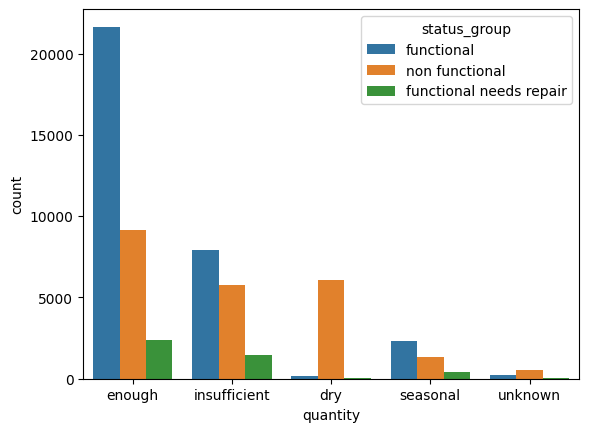

In [11]:
ax = sns.countplot(x='quantity', hue="status_group", data=df)

It can be seen obviously that although there are enough water quantity in some wells, they are non-functional. When looking at this graph, dry quantity water points have a highly correlation with non-functionality. If the water point is dry or unknown, there is high chance the water point is non functional. On the other hand, if the quantity is enough, there is a higher chance to find functional water points.

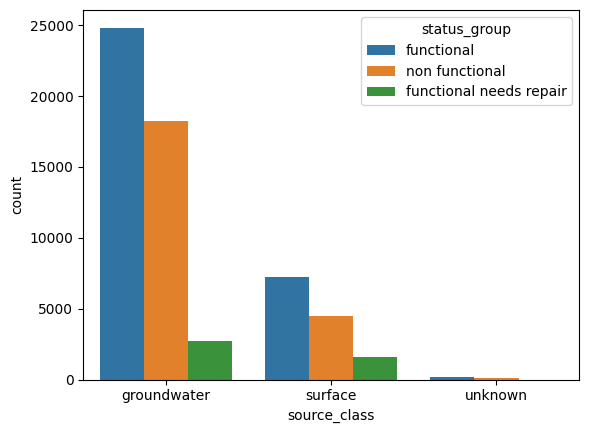

In [12]:
ax = sns.countplot(x='source_class', hue="status_group", data=df)

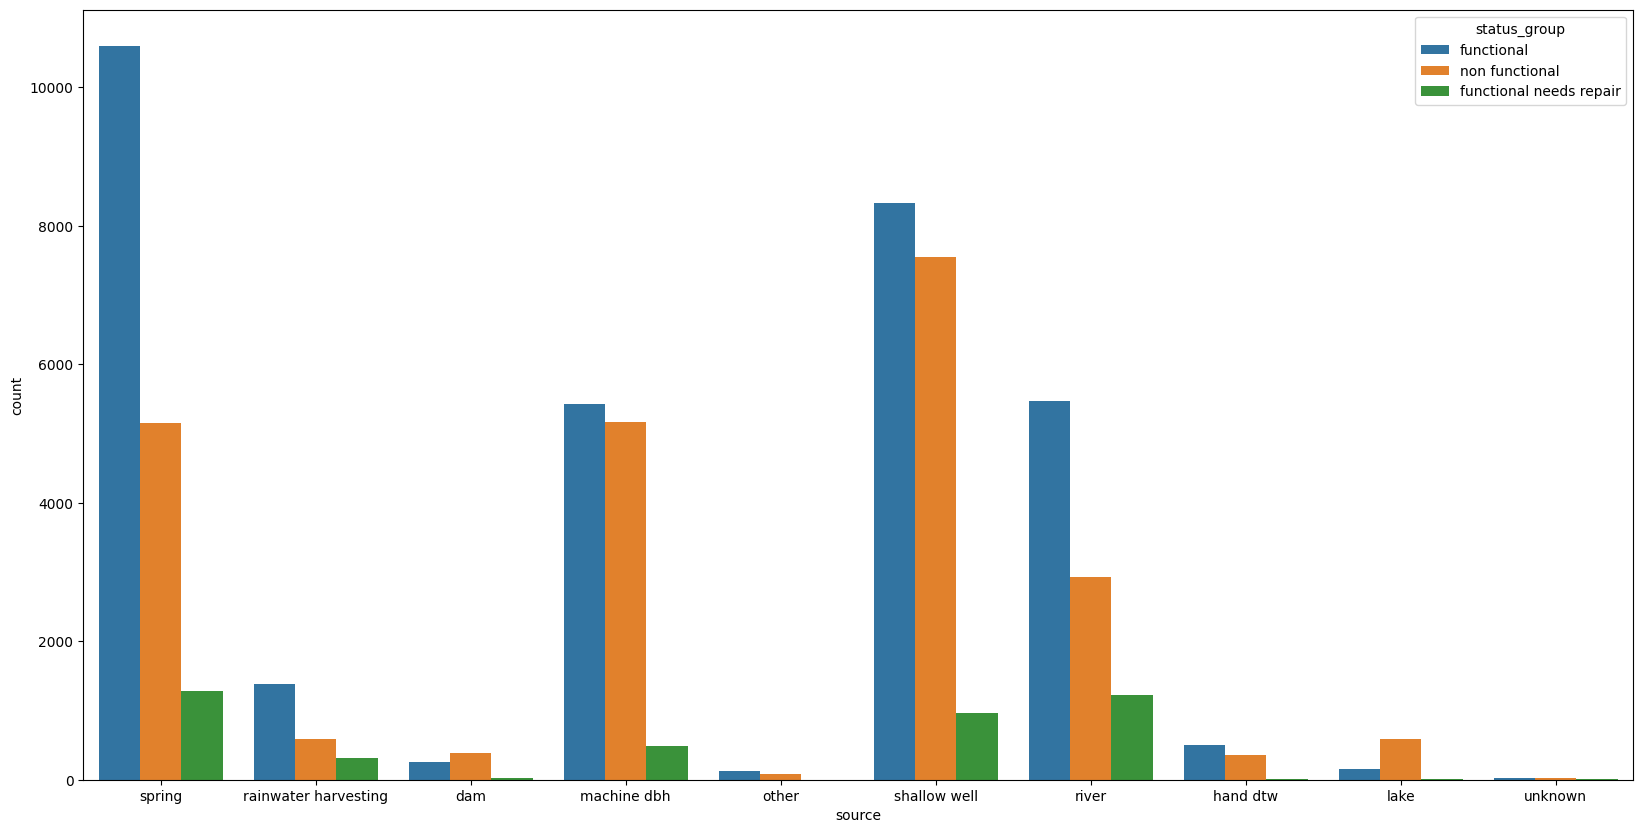

In [13]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='source', hue="status_group", data=df)

When we look at the columns, there are lots of non-functional ground water. And, it is interesting that machine dbh and swallow well sources nearly have same functional and non-functional waterpoints.

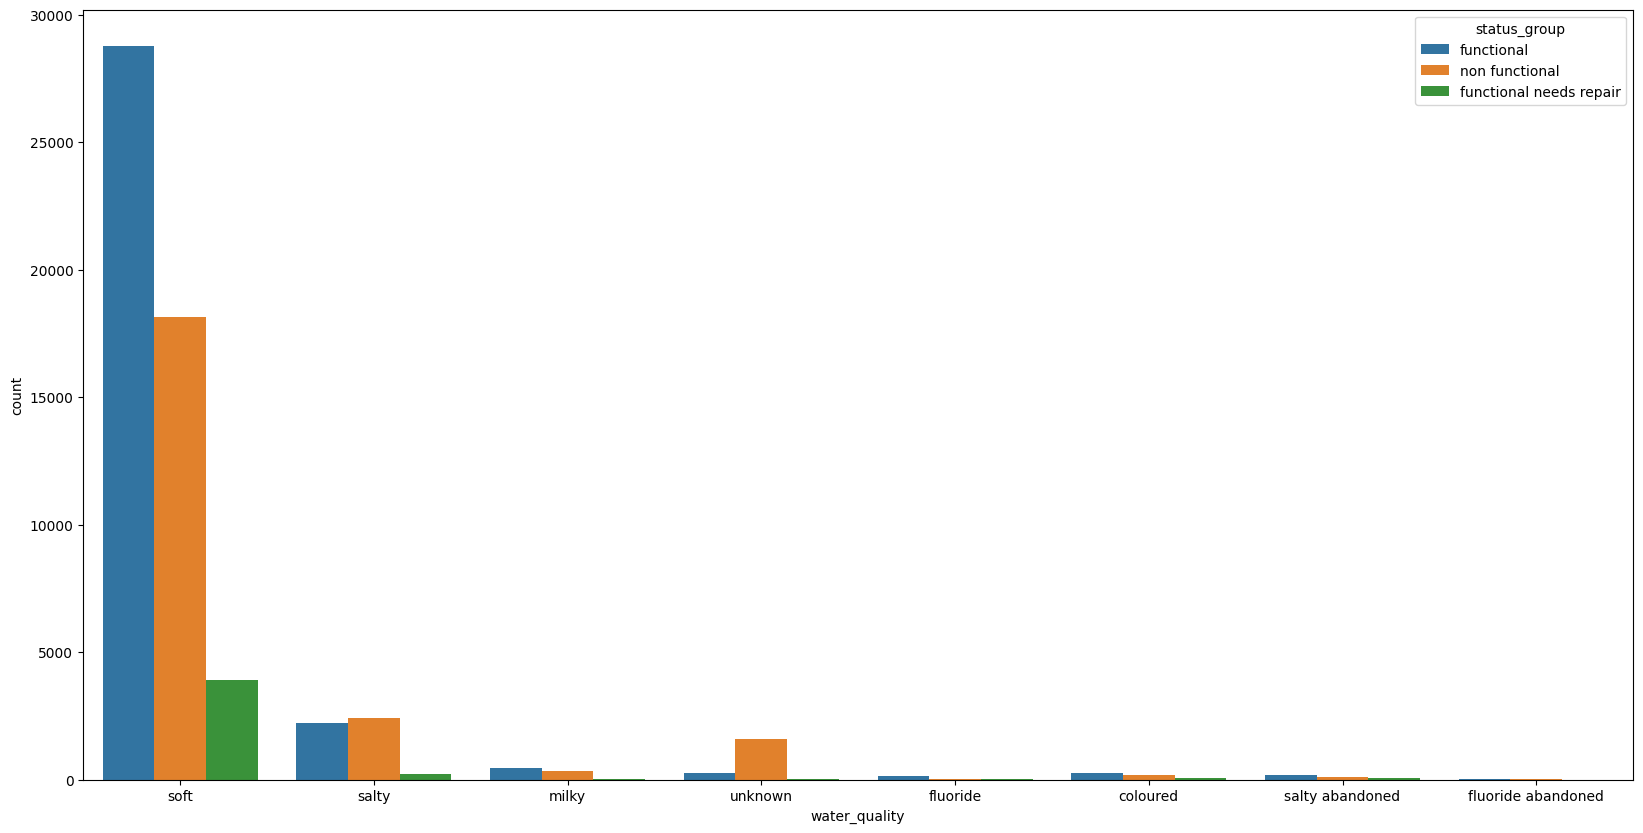

In [14]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=df)

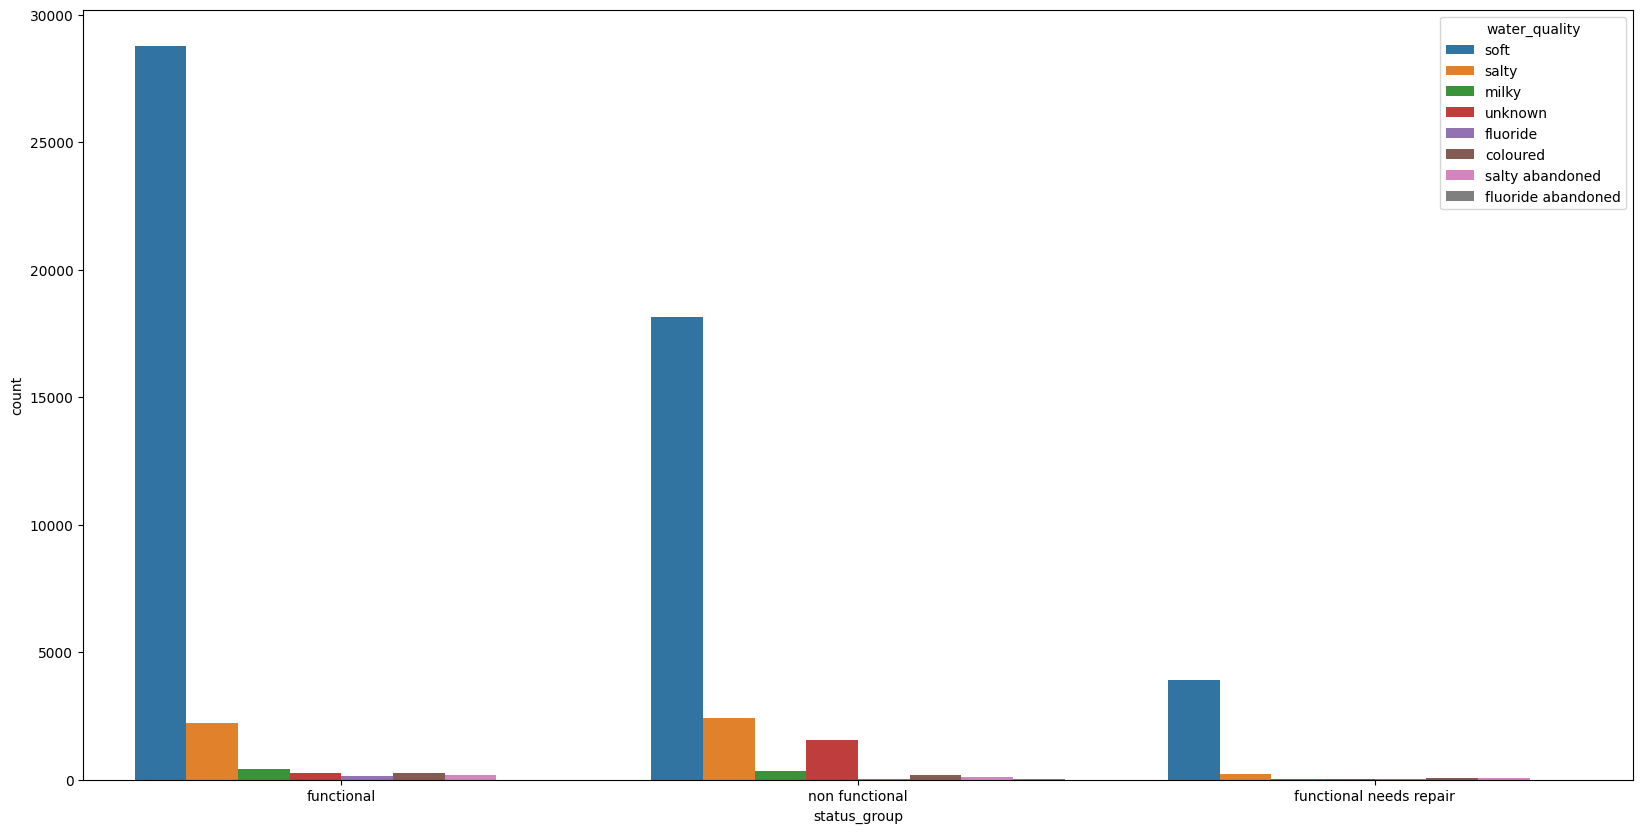

In [15]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='status_group', hue="water_quality", data=df)

Lots of non-functional water points have soft, good water quality.

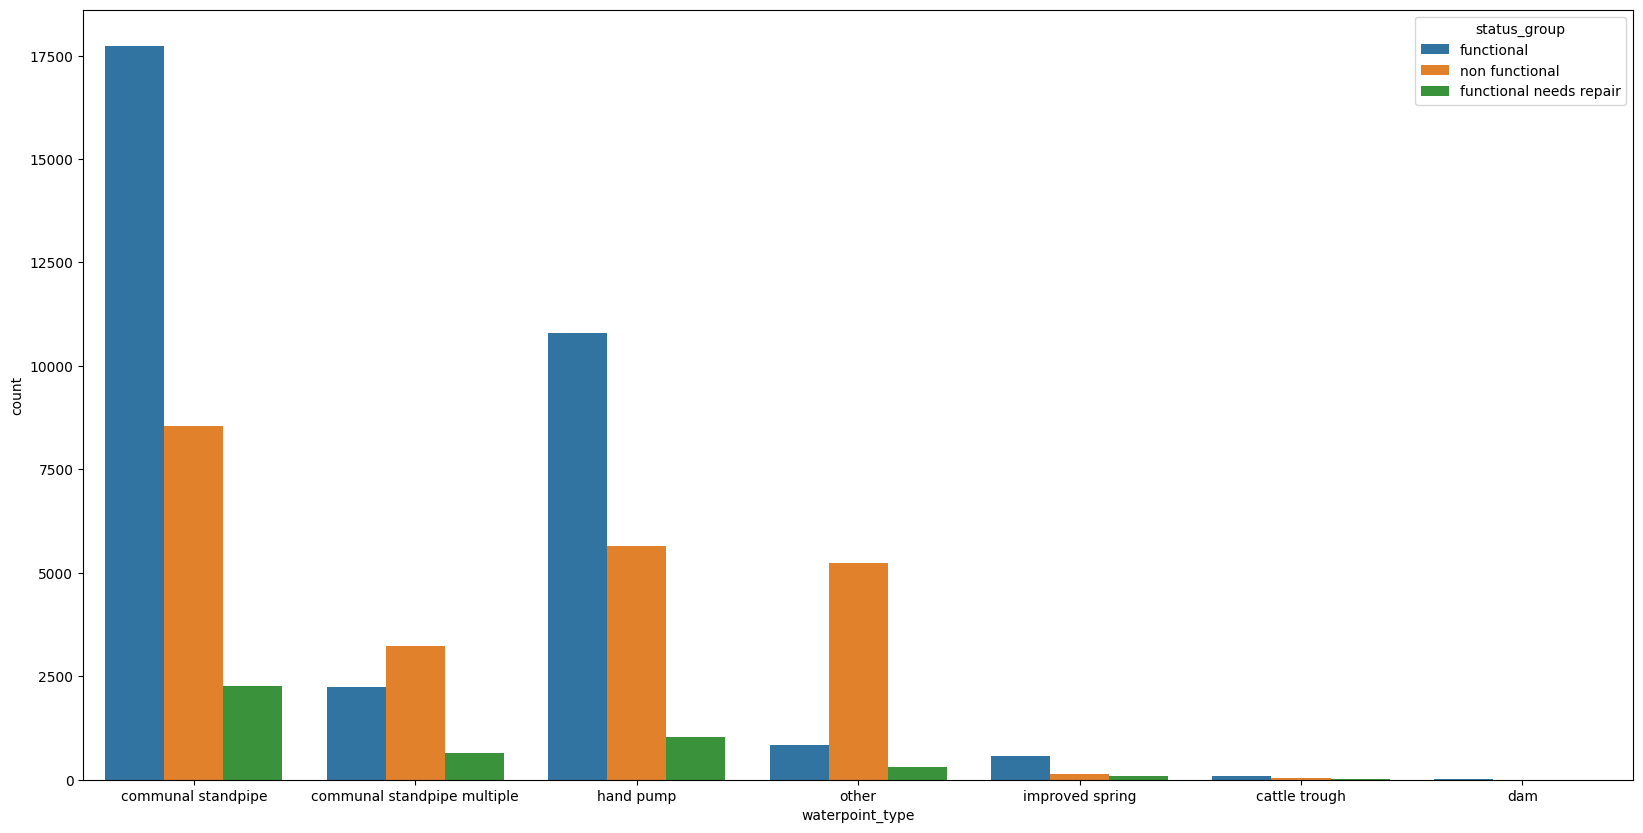

In [16]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='waterpoint_type', hue="status_group", data=df)

It can be seen that waterpoint type has correlation with funtionality of water points. Such that, communal standpipe has higher possibility to have functional, although communal standpipe multiple and others have higher possibility for non-functionality.

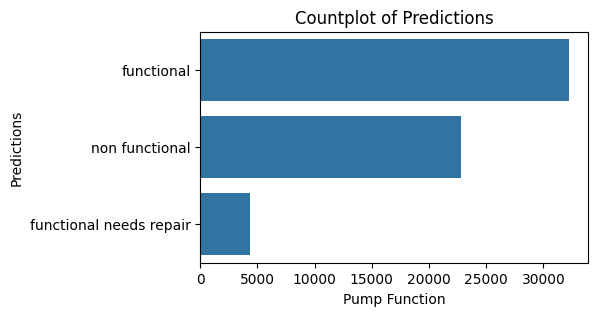

In [17]:
# Distribution of target variable.
fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(df['status_group'])
x_labels = df['status_group'].unique()

#labels
plt.title('Countplot of Predictions')
plt.xlabel('Pump Function')
plt.ylabel('Predictions')
plt.show()

We notice that the target classes are imbalanced, with the functional pumps being the most common at more than 30,000 followed by non-functional pumps at over 20,000 pumps, and the lastly the funcational-need-repair pumps at less 5,000.

##### Checking for outliers

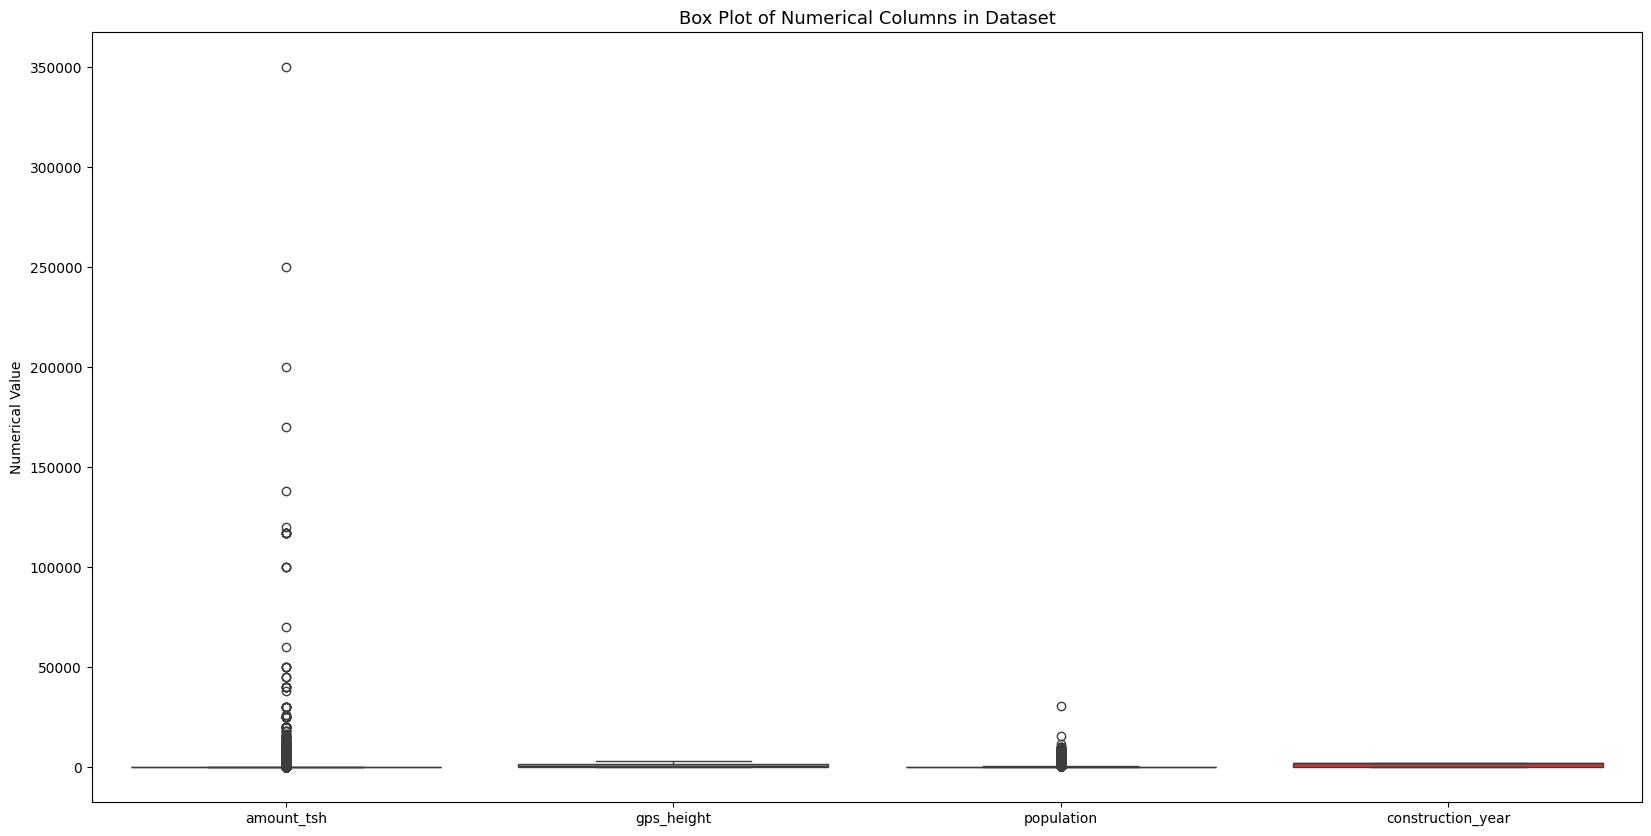

In [18]:
# Plotting box plots of numerical columns
numerical_cols = ['amount_tsh', 'gps_height', 'population', 'construction_year']
plt.figure(figsize=(20, 10))
sns.boxplot(data=[df[col] for col in numerical_cols])
plt.title("Box Plot of Numerical Columns in Dataset", fontsize=13)
plt.ylabel("Numerical Value")
plt.xticks(range(0,4), numerical_cols)
plt.show()

In [19]:
df['amount_tsh'].value_counts()

amount_tsh
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: count, Length: 98, dtype: int64

Though it seems to exist outliers in the amount_tsh column, this could not necessarily be the case. The high number of zero values are making non-zero values appear as outliers.

In [20]:
df['construction_year'].value_counts()

construction_year
0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: count, dtype: int64

There are 20,709 entries with 0 for the construction_year. There are atleast different types of sources and therefore; some of these could be natural springs that were never constructed or drilled. Some could also have been the old wells which unfortunately, date records were not properly preserved. Given the huge proportion of such entries, I will replace the zero year with 1955 as a placeholder year.

In [21]:
df['construction_year'] = df['construction_year'].replace(to_replace=0, value=1955)

In [22]:
# Check whether there are duplicates
df.duplicated(keep = 'first').sum()

1406

In [23]:
# Remove duplicates
df.drop_duplicates(keep='first', inplace=True)


### Data Preprocessing

 For preprocessing data for modeling you first have to create dummies for our categorical columns and perform a train-test-split to prevent data leakage.

In [24]:
#getting a copy of our dataframe
df1 = df.copy()

In [25]:
#checking the value count of target group
df1['status_group'].value_counts(normalize=True)

status_group
functional                 0.543711
non functional             0.386764
functional needs repair    0.069524
Name: proportion, dtype: float64

The functional group accounts for 54.4% of the dataset. The non-functional group accounts for 38.7% of the dataset. The functional needs repair group accounts for 7% of the dataset.

In [26]:
new_status_group = {'non functional': 0, 'functional': 1, 'functional needs repair' : 2}
df1['status_group'] = df1['status_group'].replace(new_status_group)
df1['status_group'].value_counts()

status_group
1    31532
0    22430
2     4032
Name: count, dtype: int64

In [27]:
# Create lists of categorical columns
categorical = ['source','quantity','water_quality','payment','management','basin']

In [28]:
# One hot encode categoricals

ohe = pd.get_dummies(df[categorical], prefix=categorical, drop_first=True)
ohe

,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,quantity_enough,...,management_wua,management_wug,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu
id,,,,,,,,,,,,,,,,,,,,,
69572,False,False,False,False,False,False,False,True,False,True,...,False,False,True,False,False,False,False,False,False,False
8776,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
34310,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
67743,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
19728,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,True,False,False,False
27263,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
37057,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


##### Defining X and y variables

In [29]:
# Assign status_group column to y series
X = ohe
y = df1['status_group']

##### Train Test Split

I will first split the data into train and test sets. The training set will be 80% of the data and the testing set 20%. I will also maintain a random state of 42 to ensure reproducibility.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [32]:
# Print head train
print(X_train.shape)

(46395, 45)


In [33]:
# Print head test
print(y_train.shape)

(46395,)


We can confirm that the x_train and y_train dataframes have the same number of rows. Therefore, we can proceed to the modelling.

### Modeling and Evaluation

I will use accuracy as the evaluation metric to compare the performance of the models as our primary metric.

The code trains and evaluates three different models: K-Nearest Neighbors, Logistic Regression, and Decision Tree

##### K-Nearest Neighbors

KNN is an effective classification and regression algorithm that uses nearby points in order to generate a prediction

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create a pipeline
pipe = Pipeline([('ss', StandardScaler()),
                ('neighbors', KNeighborsClassifier())])

In [35]:
# fit the training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('neighbors', KNeighborsClassifier())])

In [36]:
#predict on test data
y_pred = pipe.predict(X_test)

##### Cross validation

Cross-validation is used to determine an optimal set of hyperparameters when building some supervised machine learning model.

Cross-validation means repeatedly partitioning the available data into subsets, training the model on a few subsets, and validating on the remaining subsets. The main advantage is that it provides a more robust and unbiased estimate of model performance compared to the traditional validation method.

In [37]:
from sklearn.model_selection import cross_validate

# Perform cross-validation: cv_results
cv_results_pred = cross_validate(pipe, X_test, y_test, cv=5)

In [38]:
# Display cross validation test scores
cv_results_pred['test_score']

array([0.63534483, 0.62974138, 0.65387931, 0.64181034, 0.64338077])

Most of the models have an accuracy above 60%. This is a very good signal!

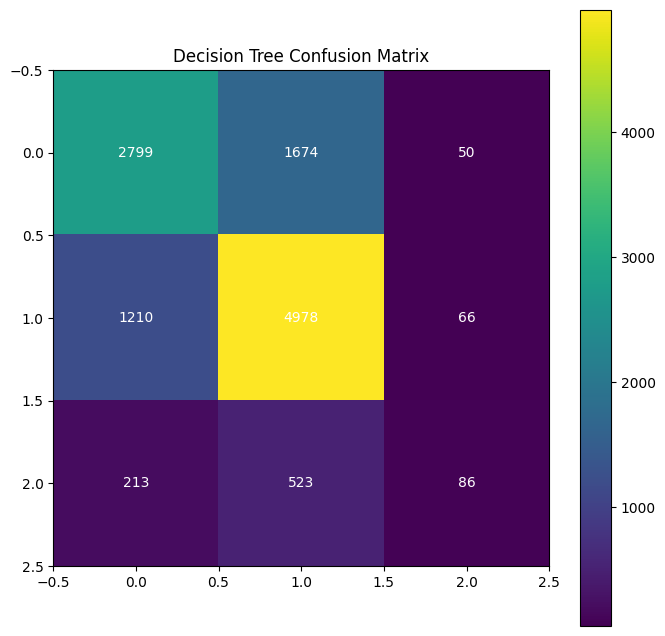

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Predict the labels of the test set
y_pred = pipe.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(cm, interpolation='nearest')
ax.set_title("Decision Tree Confusion Matrix")

# Add numbers to each cell in the matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), ha="center", va="center", color="w")

plt.colorbar(im)  
plt.show()

In [40]:
from sklearn.metrics import classification_report

In [41]:
# Classification report
target_names = ['Non-Functional', 'Functional', 'Needs-Repair']

print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Non-Functional       0.66      0.62      0.64      4523
    Functional       0.69      0.80      0.74      6254
  Needs-Repair       0.43      0.10      0.17       822

      accuracy                           0.68     11599
     macro avg       0.59      0.51      0.52     11599
  weighted avg       0.66      0.68      0.66     11599



The KNN model has an accuracy of 68%. This is a good start for a baseline model.

##### Logistic Regression

In [42]:
#Import module
from sklearn.linear_model import LogisticRegression
# Instantiate logistic regression
logreg = LogisticRegression(class_weight = 'balanced', solver = 'liblinear', random_state=42)

In [43]:
# Build a pipeline with standard scaler and logistic regression
scaled_pipeline = Pipeline([('ss', StandardScaler()), 
                              ('logreg', LogisticRegression())])

In [44]:
# Fit the training data to pipeline
scaled_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('logreg', LogisticRegression())])

In [45]:
# Predict the labels of the test set: y_pred
y_pred_log = scaled_pipeline.predict(X_test)

In [46]:
# Perform cross-validation: cv_results
cv_results_log = cross_validate(scaled_pipeline, X_test, y_test, cv=5)

In [47]:
# Display cross validation test scores
cv_results_log['test_score']

array([0.67758621, 0.66551724, 0.67887931, 0.68836207, 0.67485985])

The models have an accuracy range  between 66.6% and 68.8% 

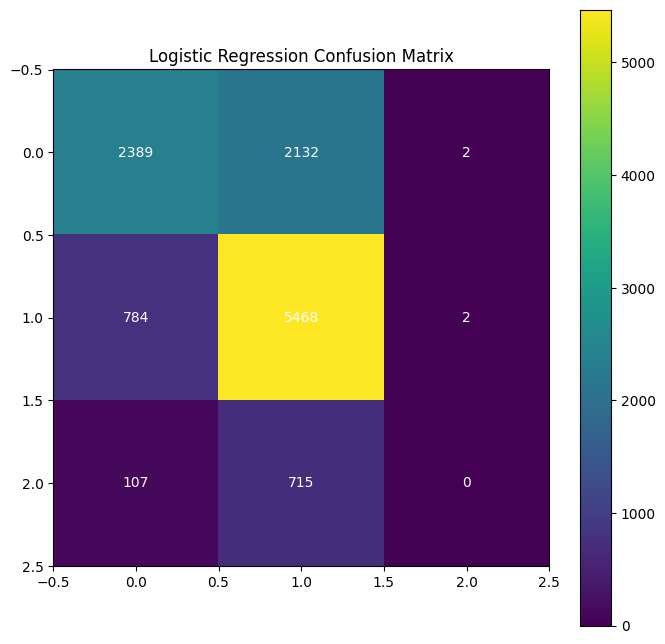

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred = scaled_pipeline.predict(X_test)  # assuming scaled_pipeline is your model
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(cm, interpolation='nearest')
ax.set_title("Logistic Regression Confusion Matrix")
# Add numbers to each cell in the matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), ha="center", va="center", color="w")
plt.colorbar(im)  
plt.show()

The confusion matrix above shows that the model has a bias towards predicting that a well is functional since it is the most frequent observation.

In [49]:
# Classification report
target_names = ['Non-Functional', 'Functional', 'Needs-Repair']

print(classification_report(y_test, y_pred_log, target_names=target_names))

                precision    recall  f1-score   support

Non-Functional       0.73      0.53      0.61      4523
    Functional       0.66      0.87      0.75      6254
  Needs-Repair       0.00      0.00      0.00       822

      accuracy                           0.68     11599
     macro avg       0.46      0.47      0.45     11599
  weighted avg       0.64      0.68      0.64     11599



The Logistic Regression model also achieved an accuracy of 68%. This is not surprising, given that Logistic Regression is a linear model that is similar to KNN in many ways. Logistic Regression is sensitive to outliers and non-linear relationships in the data.

##### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
# Instantiate the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=39)

In [52]:
# Fit train data to classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=39)

In [53]:
# Predict the labels of the test set: y_pred
y_pred_dt = clf.predict(X_test)

In [54]:
# Perform cross-validation: cv_results
cv_results_dt = cross_validate(clf, X_test, y_test, cv=5)

In [55]:
# Display cross validation test scores
cv_results_dt['test_score']

array([0.67068966, 0.67284483, 0.67543103, 0.6862069 , 0.67141009])

The models have an accuracy range  between 67.1% and 68.7% 

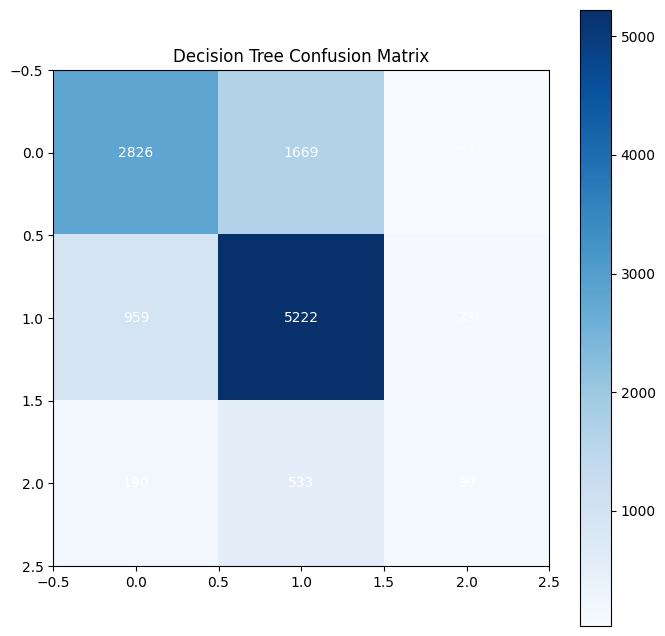

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
ax.set_title("Decision Tree Confusion Matrix")

# Add numbers to each cell in the matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), ha="center", va="center", color="w")

plt.colorbar(im)  
plt.show()

In [57]:
# Classification report
target_names = ['Non-Functional', 'Functional', 'Needs-Repair']

print(classification_report(y_test, y_pred_dt, target_names=target_names))

                precision    recall  f1-score   support

Non-Functional       0.71      0.62      0.67      4523
    Functional       0.70      0.83      0.76      6254
  Needs-Repair       0.49      0.12      0.19       822

      accuracy                           0.70     11599
     macro avg       0.64      0.53      0.54     11599
  weighted avg       0.69      0.70      0.68     11599



From our classification report, we can see that the accuracy of our model is 70%. This is a better result that the first model that we used, however, it is still less less than our desired accuracy of 75%

The Decision Tree model achieved a is slightly higher accuracy than the other two models. Decision Trees are known for their ability to handle non-linear relationships and outliers, which may explain why it performed slightly better than the other two models.

### Model Comparison

It looks like the Decision Trees model performed the best, with an accuracy score of 70%. The KNN and Logistic Regression models had similar performance, both with an accuracy score of 68%.

### Recommendations

- Use the Decision Trees model to predict the functionality of water wells in Tanzania.
- Conduct regular monitoring and evaluation of the predictive model to ensure it remains accurate and effective in identifying functional wells.

### Conclusion

The Tanzanian Water Wells project demonstrates the potential of machine learning and data analysis to improve the management and maintenance of water infrastructure in developing countries. By predicting which wells are functional, the project can help prioritize maintenance and repair efforts, ensuring that clean water is available to communities in need.

### Next Steps
Based on the results, here are future exploration areas:

- Feature engineering: Consider adding additional features that could be relevant to the problem.
- Hyperparameter tuning: Consider tuning the hyperparameters using techniques such as grid search or random search.
- Imbalanced data: Consider using techniques such as oversampling the minority class or undersampling the majority class to balance the dataset(SMOTE).